**importing libraries **

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

**data loading**

In [3]:
uploaded = files.upload()


Saving INFY.NS.csv to INFY.NS (1).csv


In [4]:
df = pd.read_csv("/content/INFY.NS.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6501 entries, 1996-01-01 to 2021-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6487 non-null   float64
 1   High       6487 non-null   float64
 2   Low        6487 non-null   float64
 3   Close      6487 non-null   float64
 4   Adj Close  6487 non-null   float64
 5   Volume     6487 non-null   float64
dtypes: float64(6)
memory usage: 355.5 KB
None


In [8]:
print(df.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1996-01-01  0.794921  0.796679  0.791015  0.796679   0.549483  204800.0
1996-01-02  0.794921  0.798828  0.793457  0.793457   0.547260  204800.0
1996-01-03  0.798828  0.798828  0.798828  0.798828   0.550965  102400.0
1996-01-04  0.791015  0.794921  0.791015  0.793554   0.547327  307200.0
1996-01-05  0.784179  0.784179  0.784179  0.784179   0.540861   51200.0


In [9]:
print(df.tail())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-10-12  1677.000000  1689.000000  1662.000000  1685.150024  1685.150024   
2021-10-13  1695.949951  1713.650024  1680.050049  1709.199951  1709.199951   
2021-10-14  1754.000000  1783.599976  1698.199951  1715.750000  1715.750000   
2021-10-18  1740.000000  1799.000000  1740.000000  1792.150024  1792.150024   
2021-10-19  1814.000000  1834.500000  1782.300049  1822.150024  1822.150024   

                Volume  
Date                    
2021-10-12   7439300.0  
2021-10-13   7104171.0  
2021-10-14  19655776.0  
2021-10-18  13438109.0  
2021-10-19  10324260.0  


**Plotting all coloumns**

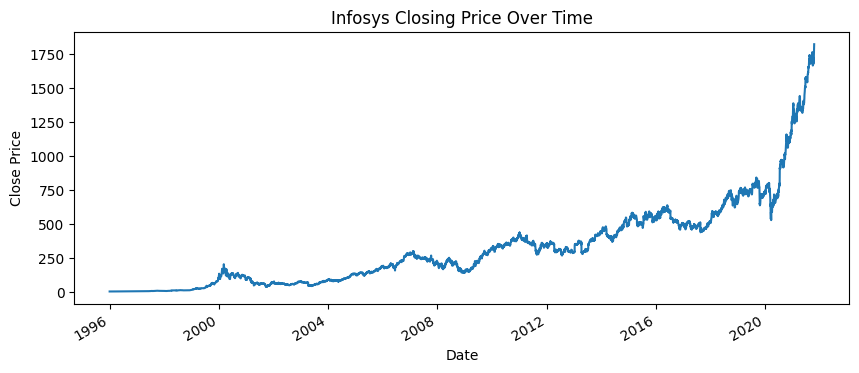

In [10]:
plt.figure(figsize=(10,4))
df['Close'].plot(title="Infosys Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

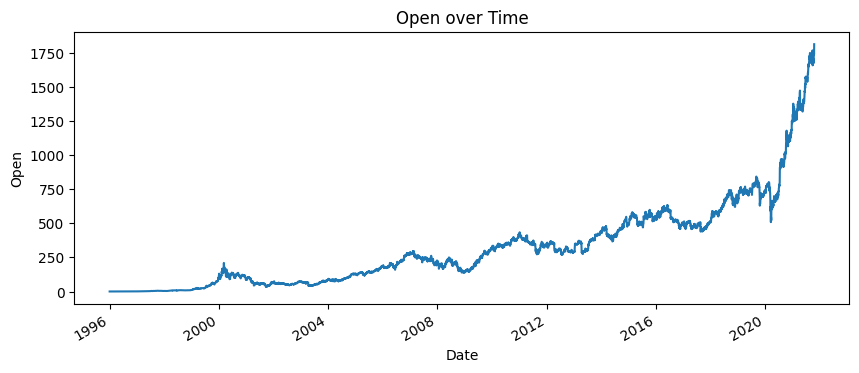

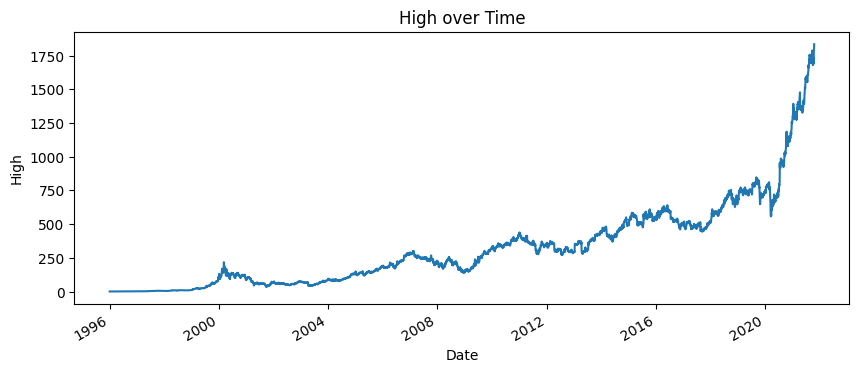

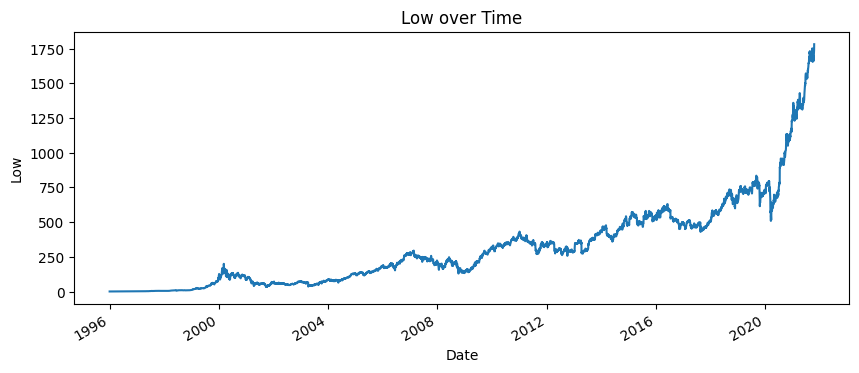

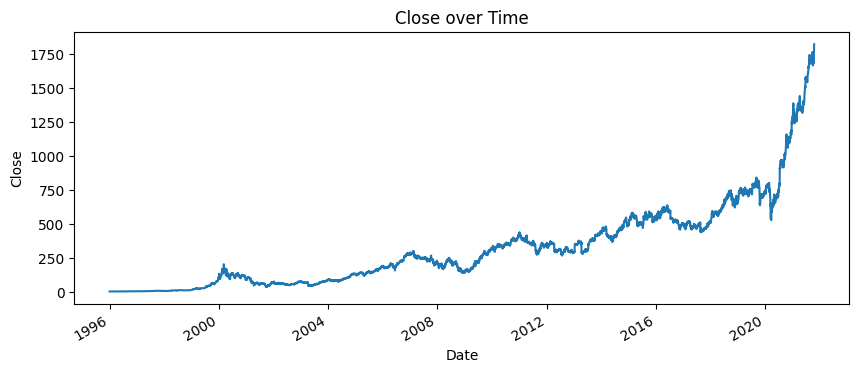

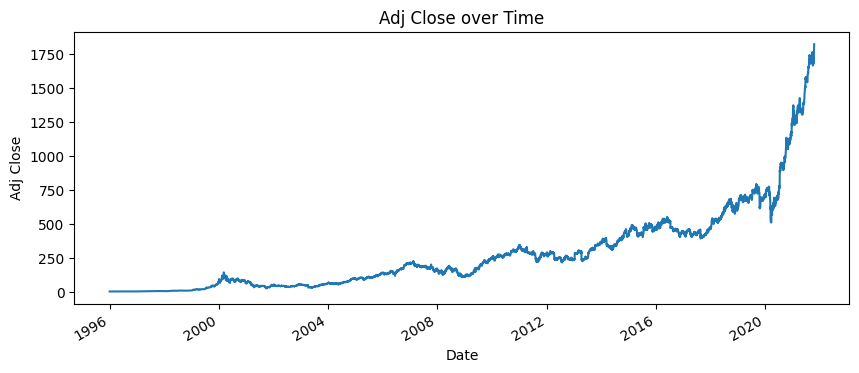

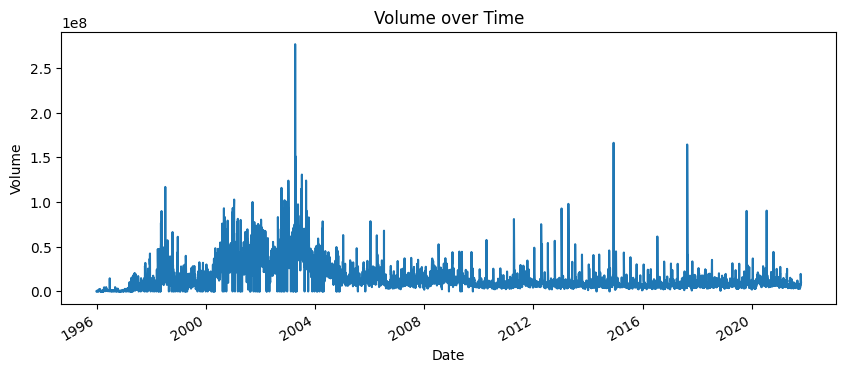

In [11]:
for col in df.columns:
    plt.figure(figsize=(10,4))
    df[col].plot(title=f"{col} over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()

**Data Normalization**

In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df[features].values

In [13]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data)

In [14]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = pd.DataFrame(scaled_values, columns=numeric_columns, index=df.index)
print(df_scaled.head())

                Open      High       Low     Close    Volume
Date                                                        
1996-01-01  0.000018  0.000017  0.000044  0.000018  0.000740
1996-01-02  0.000018  0.000018  0.000045  0.000017  0.000740
1996-01-03  0.000020  0.000018  0.000048  0.000020  0.000370
1996-01-04  0.000015  0.000016  0.000044  0.000017  0.001111
1996-01-05  0.000012  0.000010  0.000040  0.000012  0.000185


**Plotting scaled data**

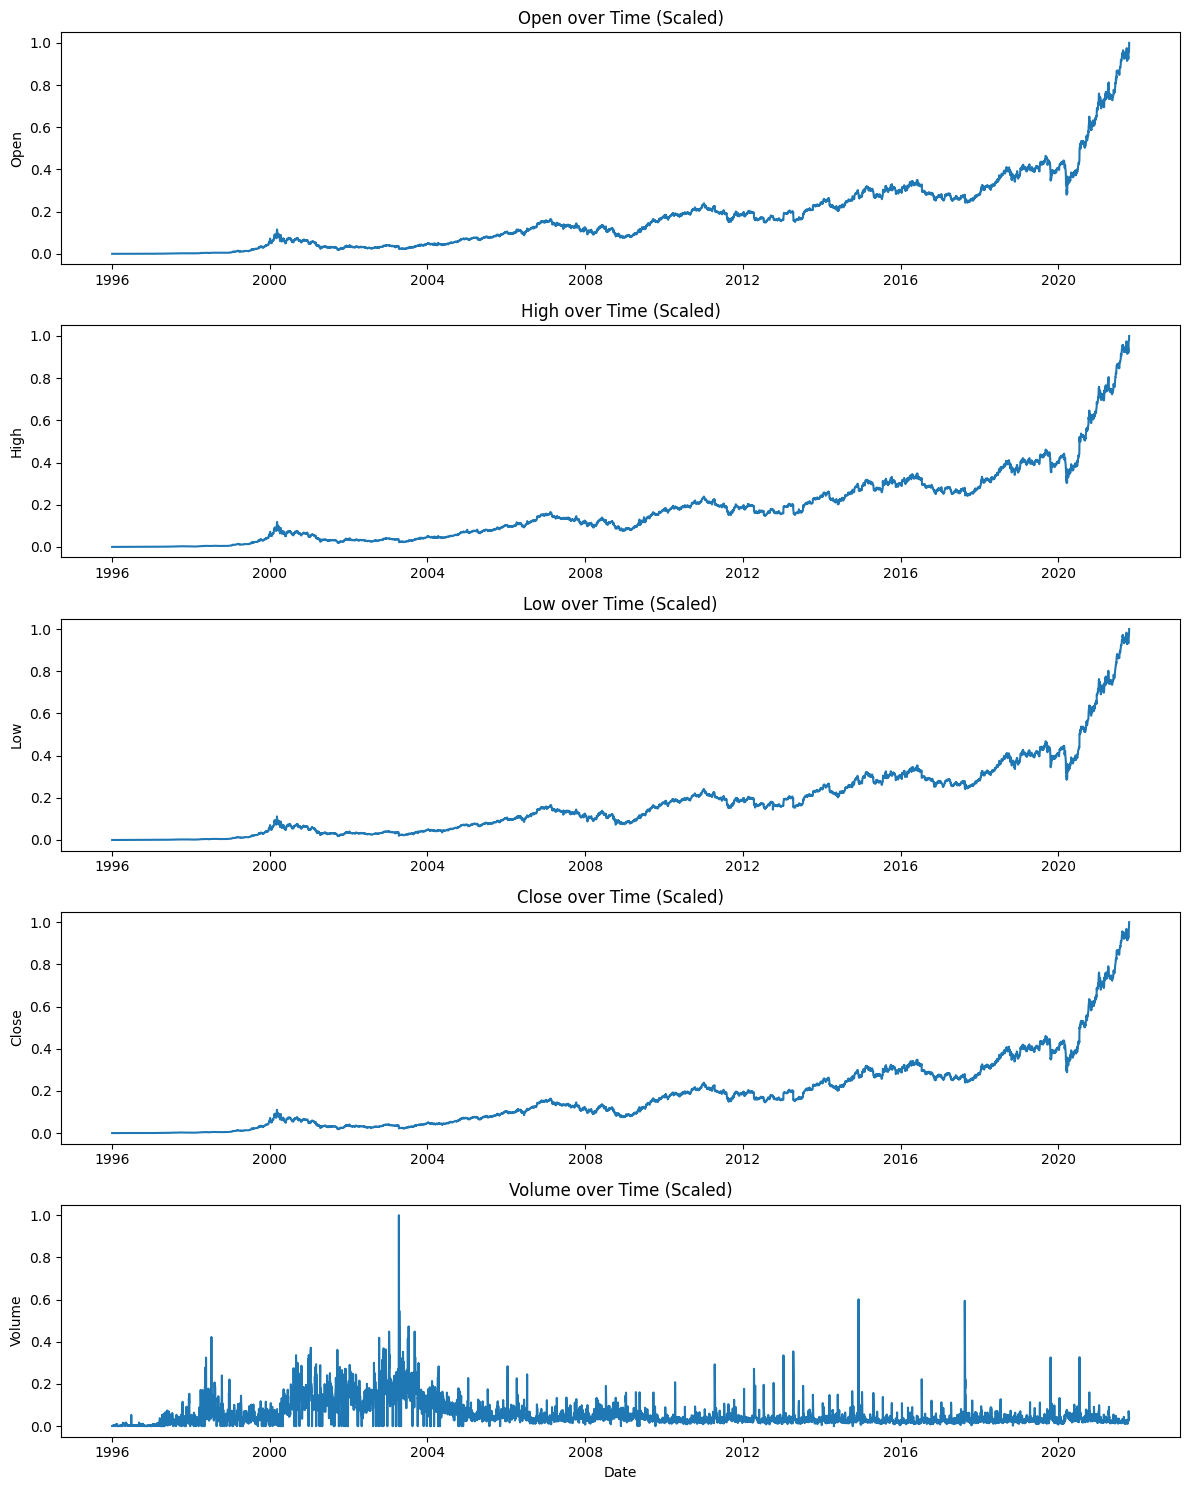

In [15]:
plt.rcParams['figure.figsize'] = (12, 15)
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    plt.plot(df_scaled.index, df_scaled[col], color='tab:blue')
    plt.title(f"{col} over Time (Scaled)")
    plt.ylabel(col)
    if i == len(columns):
        plt.xlabel("Date")
plt.tight_layout()
plt.show()

**Creating Sliding Window Sequence**

In [16]:
def create_sequence(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data.iloc[i-window_size:i].values)  # past window_size rows
        y.append(data.iloc[i].values)                # target = all features
    return np.array(x), np.array(y)


In [17]:
window_size = 60
X, y = create_sequence(df_scaled, window_size)

In [18]:
print("X shape:", X.shape)  # (samples, window_size, features)
print("y shape:", y.shape)

X shape: (6441, 60, 5)
y shape: (6441, 5)


***Train and Test Split***

In [19]:
train_size = int(0.8 * X.shape[0])
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5152, 60, 5)
y_train shape: (5152, 5)
X_test shape: (1289, 60, 5)
y_test shape: (1289, 5)


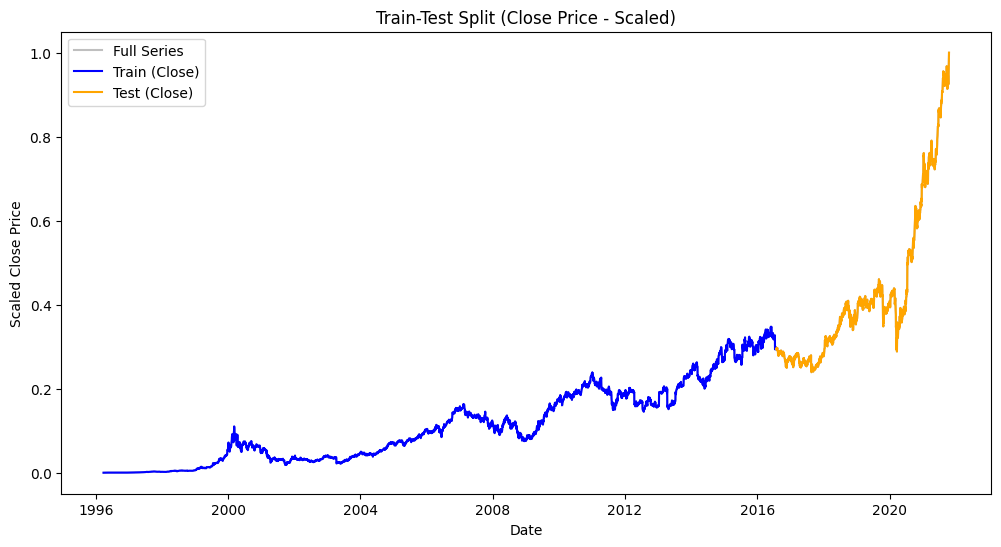

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df_scaled.index[window_size:], df_scaled['Close'].iloc[window_size:], label="Full Series", color="gray", alpha=0.5)
plt.plot(df_scaled.index[window_size:train_size+window_size],
         df_scaled['Close'].iloc[window_size:train_size+window_size],
         label="Train (Close)", color="blue")
plt.plot(df_scaled.index[train_size+window_size:],
         df_scaled['Close'].iloc[train_size+window_size:],
         label="Test (Close)", color="orange")
plt.title("Train-Test Split (Close Price - Scaled)")
plt.xlabel("Date")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.show()

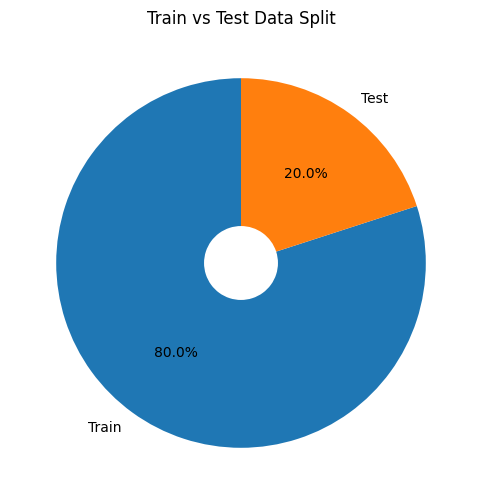

In [23]:
train_size = int(0.8 * X.shape[0])
test_size = X.shape[0] - train_size

sizes = [train_size, test_size]
labels = ['Train', 'Test']
colors = ['#1f77b4', '#ff7f0e']  # Blue for train, Orange for test

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.8})
plt.title("Train vs Test Data Split")
plt.show()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [26]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))  # return_sequences=False by default
model.add(Dropout(0.2))
model.add(Dense(5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [28]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [30]:
print("NaN present:", np.isnan(df_scaled.values).any())
print("Inf present:", np.isinf(df_scaled.values).any())

NaN present: True
Inf present: False


In [31]:
print(df_scaled.isnull().sum())
print(df_scaled[df_scaled.isnull().any(axis=1)].head())

Open      14
High      14
Low       14
Close     14
Volume    14
dtype: int64
            Open  High  Low  Close  Volume
Date                                      
2009-12-23   NaN   NaN  NaN    NaN     NaN
2009-12-24   NaN   NaN  NaN    NaN     NaN
2009-12-29   NaN   NaN  NaN    NaN     NaN
2009-12-30   NaN   NaN  NaN    NaN     NaN
2009-12-31   NaN   NaN  NaN    NaN     NaN


In [33]:
df = df.ffill().bfill()
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [34]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
161/16

In [36]:
print("NaN in X_train:", np.isnan(X_train).any())
print("Inf in X_train:", np.isinf(X_train).any())
print("NaN in y_train:", np.isnan(y_train).any())
print("Inf in y_train:", np.isinf(y_train).any())


NaN in X_train: True
Inf in X_train: False
NaN in y_train: True
Inf in y_train: False


In [37]:
df = df.ffill().bfill()

In [38]:
print("NaN in df:", df.isnull().any().any())  # should be False


NaN in df: False


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
df_scaled = pd.DataFrame(scaled_values, columns=['Open','High','Low','Close','Volume'], index=df.index)

In [40]:
df_scaled = df_scaled.dropna()

In [41]:
def create_sequence(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data.iloc[i-window_size:i].values)  # past window_size rows
        y.append(data.iloc[i].values)                # target = all features
    return np.array(x), np.array(y)


In [42]:
window_size = 60
X, y = create_sequence(df_scaled, window_size)

In [43]:
print("NaN in X:", np.isnan(X).any())
print("NaN in y:", np.isnan(y).any())

NaN in X: False
NaN in y: False


In [44]:
train_size = int(0.8 * X.shape[0])
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Verify shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5152, 60, 5)
y_train shape: (5152, 5)
X_test shape: (1289, 60, 5)
y_test shape: (1289, 5)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,855 (202.56 KB)

 Trainable params: 51,855 (202.56 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - loss: 0.0067 - mae: 0.0543 - val_loss: 0.0044 - val_mae: 0.0413
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - loss: 0.0011 - mae: 0.0224 - val_loss: 0.0034 - val_mae: 0.0369
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 9.4188e-04 - mae: 0.0199 - val_loss: 0.0025 - val_mae: 0.0289
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 8.1388e-04 - mae: 0.0182 - val_loss: 0.0023 - val_mae: 0.0262
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 8.6360e-04 - mae: 0.0179 - val_loss: 0.0026 - val_mae: 0.0287
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - loss: 7.3865e-04 - mae: 0.0171 - val_loss: 0.0023 - val_mae: 0.0286
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - loss: 7.4760e-04 - mae: 0.0165 - val_loss: 0.0027 - val_mae: 0.0307
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: 7.1784e-04 - mae: 0.0163 - val_loss: 0.0032 - val_mae: 0.0343
Epoch 9/

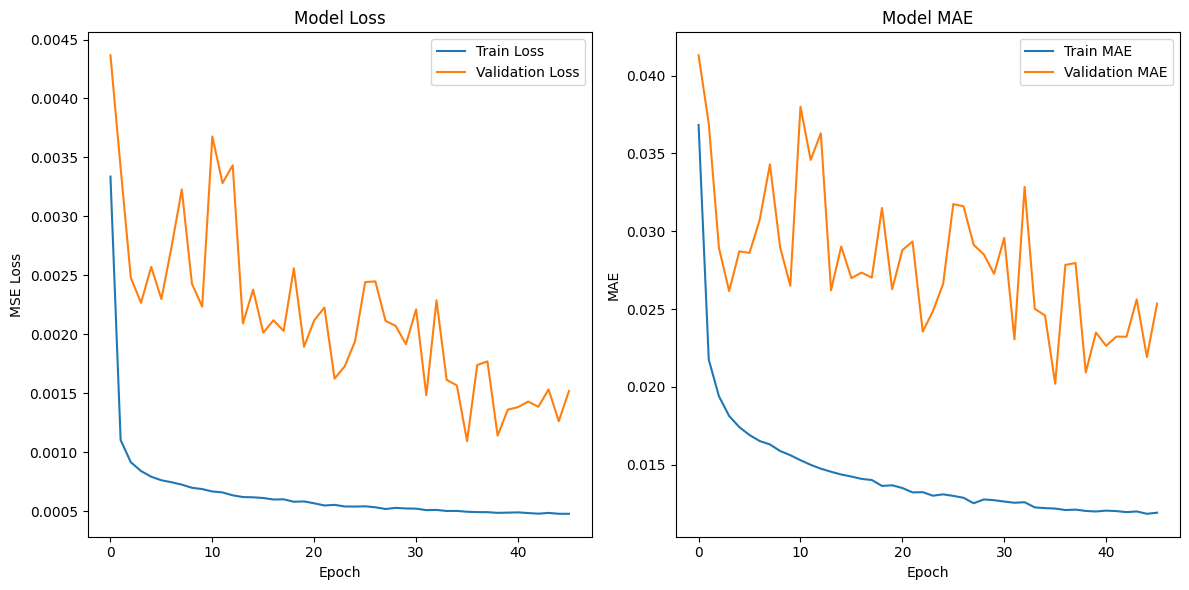

In [48]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12,6))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()

    # MAE
    plt.subplot(1,2,2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


**Heatmap of Actual vs Predicted**

In [50]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


In [51]:
y_test_original = scaler.inverse_transform(y_test)
y_pred_original = scaler.inverse_transform(y_pred)

In [52]:
columns = ['Open','High','Low','Close','Volume']
df_compare = pd.DataFrame(np.hstack([y_test_original, y_pred_original]),
                          columns=[f"Actual_{c}" for c in columns] + [f"Pred_{c}" for c in columns])

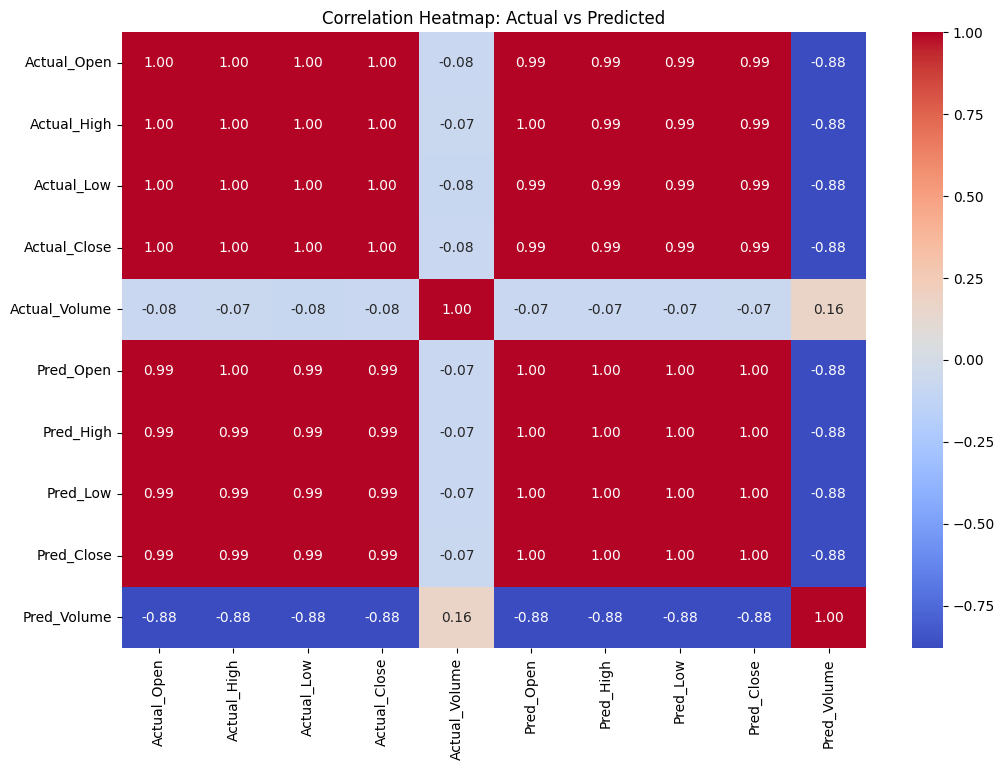

In [55]:
corr = df_compare.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Actual vs Predicted")
plt.show()

**this shows you which features the model predicts well (closer to 1) and which are off**

**Anomaly plotting**

they are unusuall data points that deviate from the expected pattern

In [58]:
errors = np.abs(y_test_original - y_pred_original)

In [59]:
columns = ['Open','High','Low','Close','Volume']
df_errors = pd.DataFrame(errors, columns=columns, index=df_scaled.index[-len(y_test):])

In [60]:
thresholds = df_errors.mean() + 2 * df_errors.std()
print("Anomaly thresholds per feature:\n", thresholds)

Anomaly thresholds per feature:
 Open      1.298656e+02
High      1.310411e+02
Low       1.278731e+02
Close     1.287021e+02
Volume    2.140105e+07
dtype: float64


In [61]:
anomalies = df_errors > thresholds
df_anomalies = df_errors[anomalies.any(axis=1)]  # any feature exceeding threshold
print("Detected anomalies:\n", df_anomalies)

Detected anomalies:
                   Open        High         Low       Close       Volume
Date                                                                   
2016-10-14    1.892700   11.480896   21.492554   10.111634   28149549.5
2017-01-13   14.953278   15.026520   13.270813   11.920685   24295213.0
2017-04-13   26.075134   21.488647   42.977509   45.011811   24392623.0
2017-08-18   12.358581    7.461090   49.603821   34.319763  157702779.5
2017-08-21   32.609436   37.403809   53.137604   59.067688   81415380.0
...                ...         ...         ...         ...          ...
2021-10-12  128.466431  123.103760  123.983887  130.283691   14440535.5
2021-10-13  148.478515  148.868896  143.132813  155.354370   14040297.0
2021-10-14  207.407104  219.761475  162.213623  162.771606   26517057.0
2021-10-18  193.746582  235.657715  204.587524  239.457153   20135879.0
2021-10-19  266.999390  270.696167  246.534912  268.742309   16823044.0

[140 rows x 5 columns]


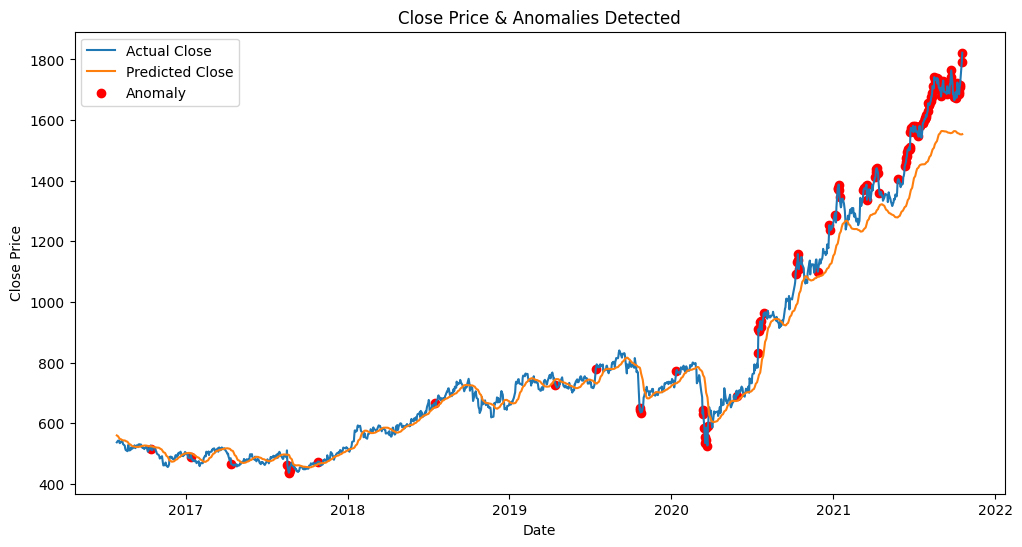

In [62]:
plt.figure(figsize=(12,6))
plt.plot(df_scaled.index[-len(y_test):], y_test_original[:,3], label='Actual Close')
plt.plot(df_scaled.index[-len(y_test):], y_pred_original[:,3], label='Predicted Close')
anomaly_points = df_anomalies.index
plt.scatter(anomaly_points, y_test_original[df_scaled.index[-len(y_test):].isin(anomaly_points),3],
            color='red', label='Anomaly', marker='o')
plt.title("Close Price & Anomalies Detected")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [63]:
columns = ['Open','High','Low','Close','Volume']
df_compare = pd.DataFrame(
    data = np.hstack([y_test_original, y_pred_original]),
    columns = [f"Actual_{c}" for c in columns] + [f"Pred_{c}" for c in columns]
)

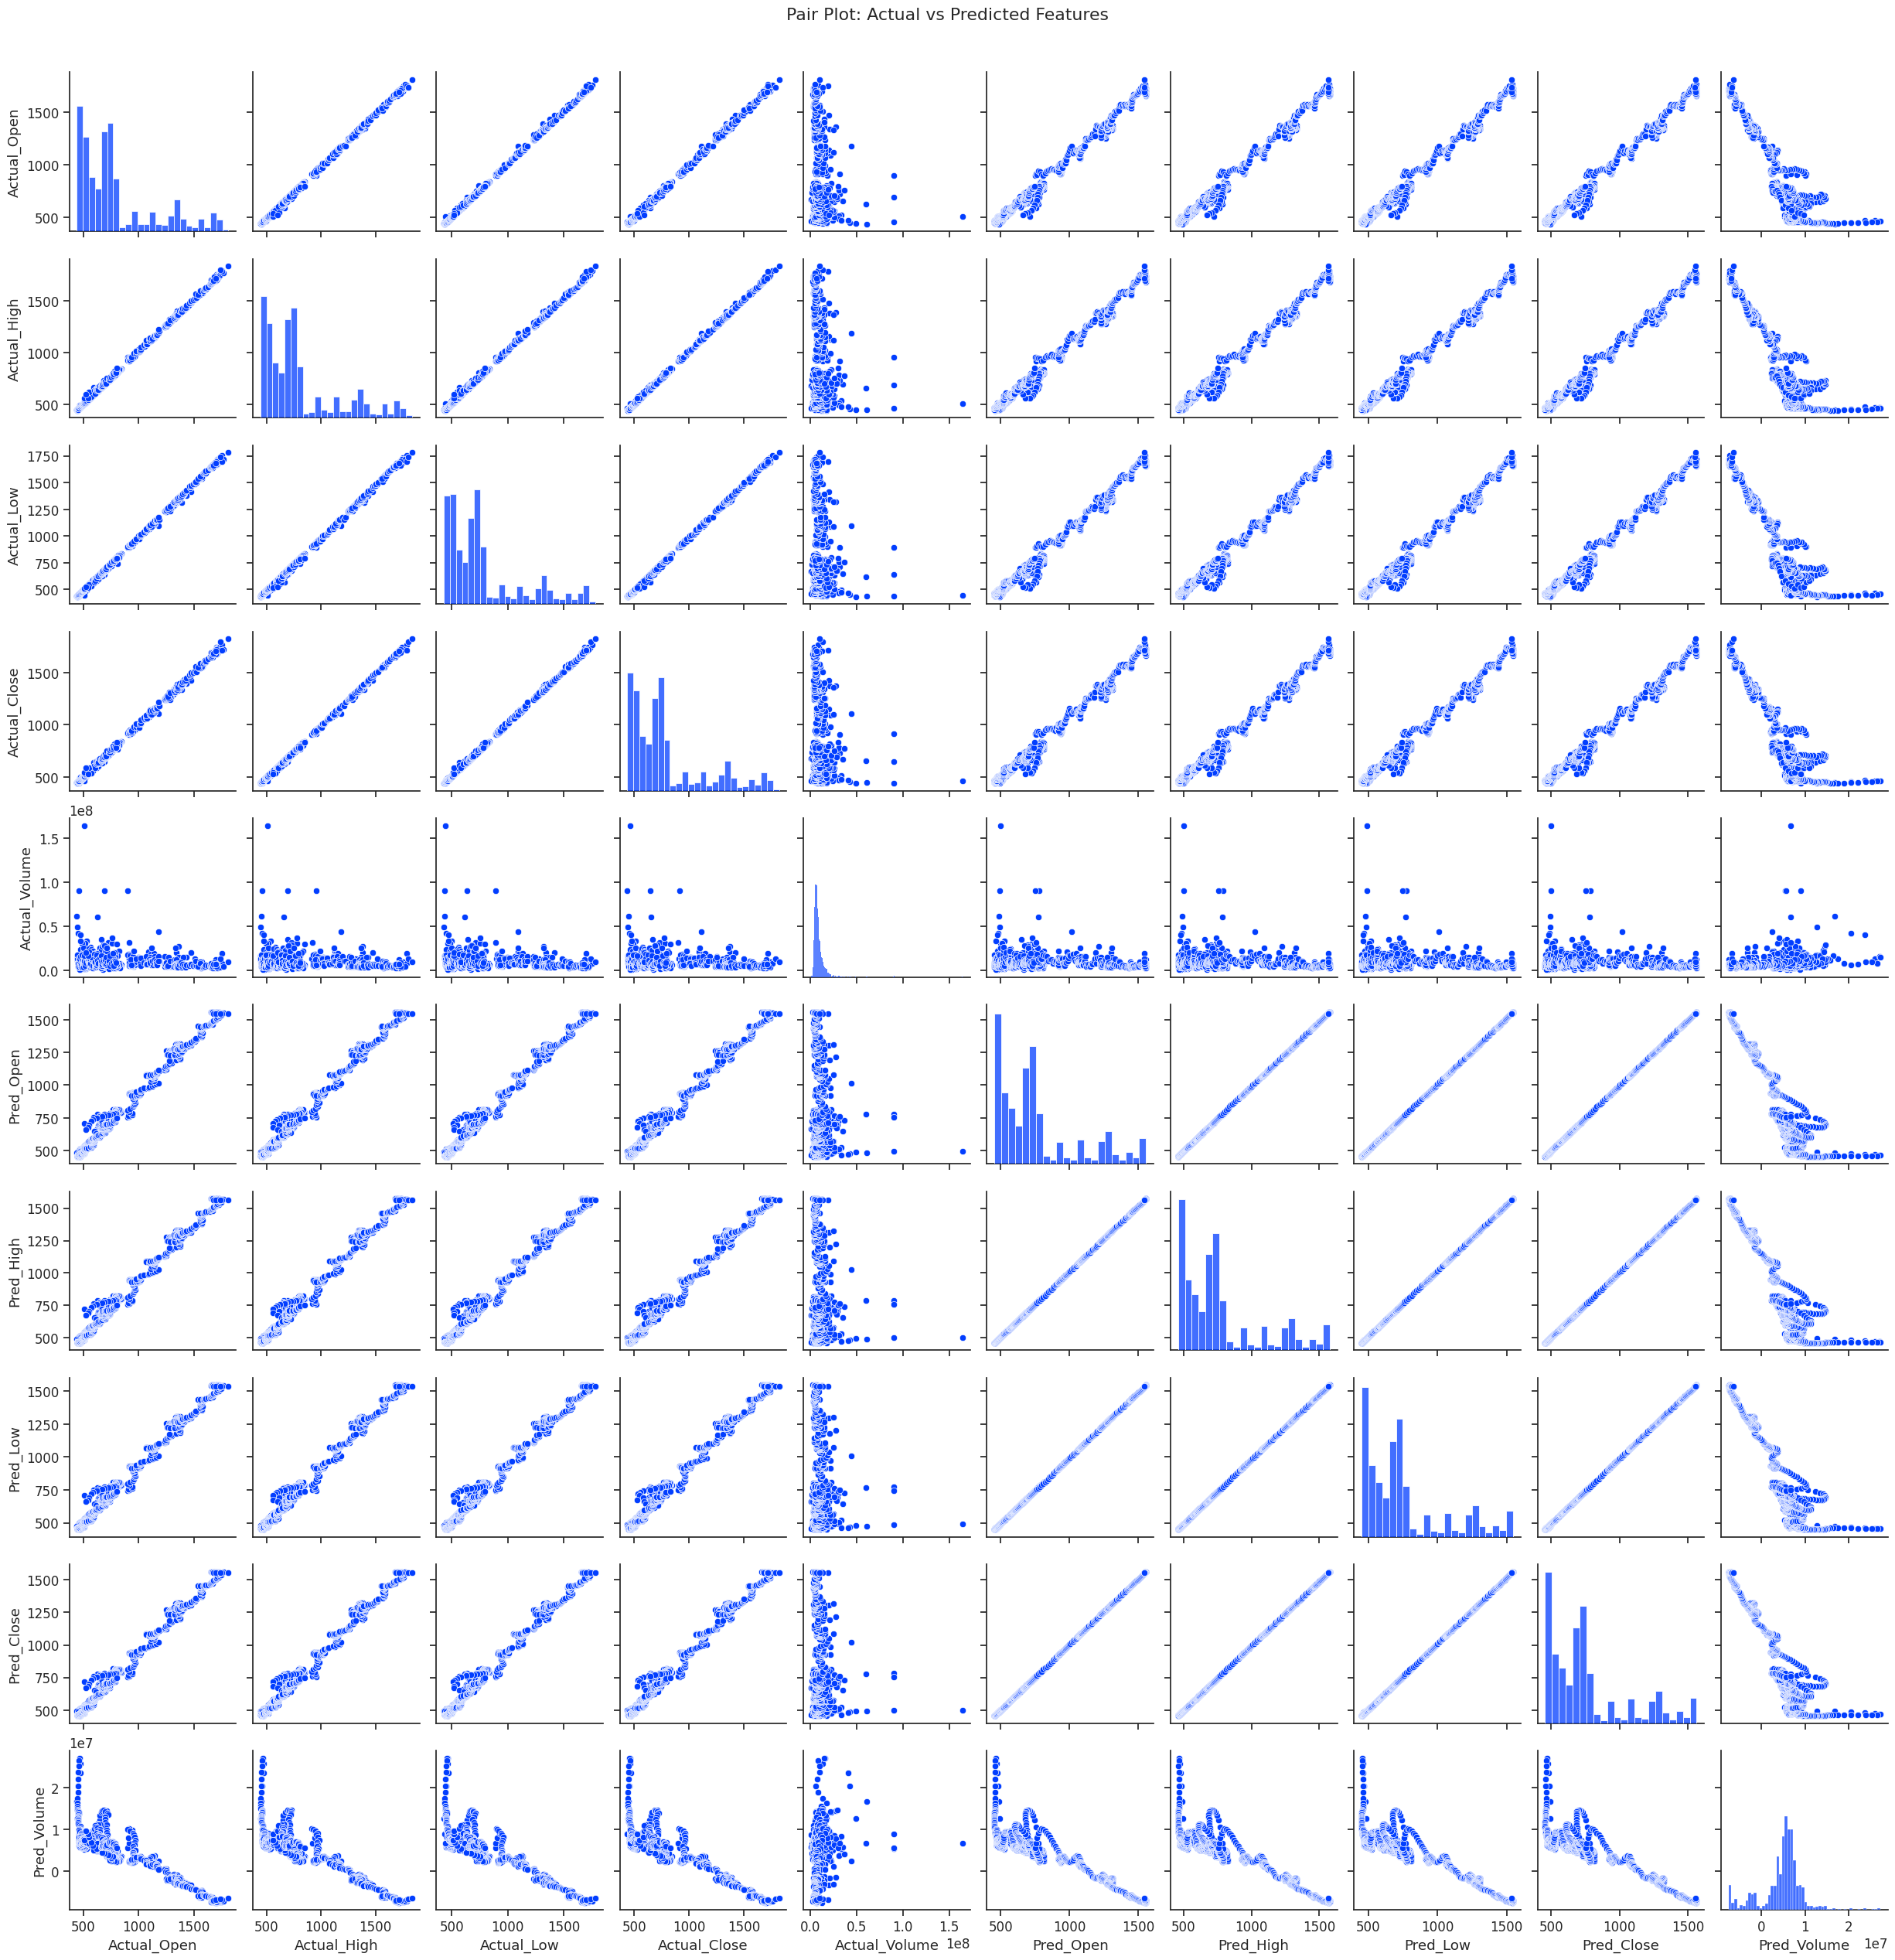

In [65]:
sns.set(style="ticks", palette="bright", font_scale=1.1)
sns.pairplot(df_compare)
plt.suptitle("Pair Plot: Actual vs Predicted Features", y=1.02)
plt.show()

In [67]:
columns = ['Open','High','Low','Close','Volume']
df_pred = pd.DataFrame(y_pred_original, columns=columns)

In [68]:
print("Head of predicted values:")
print(df_pred.head())


Head of predicted values:
         Open        High         Low       Close     Volume
0  558.765015  565.450073  555.055054  559.744141  8600244.0
1  555.861938  562.481934  552.257629  556.687683  8428368.0
2  553.288269  559.824890  549.705811  553.995728  8273067.0
3  551.082642  557.524353  547.475281  551.674438  8112141.5
4  549.250427  555.591431  545.582642  549.725098  7948643.5


In [69]:
print(df_pred.tail())

             Open         High          Low        Close     Volume
1284  1548.533569  1565.896240  1538.016113  1554.866333 -7001235.5
1285  1547.471436  1564.781128  1536.917236  1553.845581 -6936126.0
1286  1546.592896  1563.838501  1535.986328  1552.978394 -6861281.0
1287  1546.253418  1563.342285  1535.412476  1552.692871 -6697770.0
1288  1547.000610  1563.803833  1535.765137  1553.407715 -6498784.0


**Comparing the actual vs predicted value**

In [70]:
df_actual = pd.DataFrame(y_test_original, columns=columns)
df_compare = pd.concat([df_actual.add_prefix('Actual_'), df_pred.add_prefix('Pred_')], axis=1)
print(df_compare.head())
print(df_compare.tail())

   Actual_Open  Actual_High  Actual_Low  Actual_Close  Actual_Volume  \
0   536.299988   538.375000  533.250000    536.924988      8156784.0   
1   535.750000   543.924988  534.174988    542.625000      9096662.0   
2   539.950012   542.500000  537.500000    541.900024      6822502.0   
3   542.825012   543.250000  535.150024    542.450012      7213460.0   
4   543.200012   543.450012  535.025024    535.900024      4237278.0   

    Pred_Open   Pred_High    Pred_Low  Pred_Close  Pred_Volume  
0  558.765015  565.450073  555.055054  559.744141    8600244.0  
1  555.861938  562.481934  552.257629  556.687683    8428368.0  
2  553.288269  559.824890  549.705811  553.995728    8273067.0  
3  551.082642  557.524353  547.475281  551.674438    8112141.5  
4  549.250427  555.591431  545.582642  549.725098    7948643.5  
      Actual_Open  Actual_High   Actual_Low  Actual_Close  Actual_Volume  \
1284  1677.000000  1689.000000  1662.000000   1685.150024      7439300.0   
1285  1695.949951  1713.6

Combine orginal data with predicted value for downloading

In [73]:
columns = ['Open','High','Low','Close','Volume']

In [74]:
df_pred = pd.DataFrame(y_pred_original, columns=[f'Pred_{c}' for c in columns])

In [75]:
df_original = df_scaled[-len(df_pred):]  # last N rows matching predictions
df_original = pd.DataFrame(scaler.inverse_transform(df_original), columns=columns, index=df_scaled.index[-len(df_pred):])

In [76]:
df_combined = pd.concat([df_original.add_prefix('Actual_'), df_pred], axis=1)
df_combined.head()

,Actual_Open,Actual_High,Actual_Low,Actual_Close,Actual_Volume,Pred_Open,Pred_High,Pred_Low,Pred_Close,Pred_Volume
2016-07-29 00:00:00,536.299988,538.375000,533.250000,536.924988,8156784.0,NaN,NaN,NaN,NaN,NaN
2016-08-01 00:00:00,535.750000,543.924988,534.174988,542.625000,9096662.0,NaN,NaN,NaN,NaN,NaN
2016-08-02 00:00:00,539.950012,542.500000,537.500000,541.900024,6822502.0,NaN,NaN,NaN,NaN,NaN
2016-08-03 00:00:00,542.825012,543.250000,535.150024,542.450012,7213460.0,NaN,NaN,NaN,NaN,NaN
2016-08-04 00:00:00,543.200012,543.450012,535.025024,535.900024,4237278.0,NaN,NaN,NaN,NaN,NaN


In [77]:
df_combined.tail()

,Actual_Open,Actual_High,Actual_Low,Actual_Close,Actual_Volume,Pred_Open,Pred_High,Pred_Low,Pred_Close,Pred_Volume
1284,NaN,NaN,NaN,NaN,NaN,1548.533569,1565.896240,1538.016113,1554.866333,-7001235.5
1285,NaN,NaN,NaN,NaN,NaN,1547.471436,1564.781128,1536.917236,1553.845581,-6936126.0
1286,NaN,NaN,NaN,NaN,NaN,1546.592896,1563.838501,1535.986328,1552.978394,-6861281.0
1287,NaN,NaN,NaN,NaN,NaN,1546.253418,1563.342285,1535.412476,1552.692871,-6697770.0
1288,NaN,NaN,NaN,NaN,NaN,1547.000610,1563.803833,1535.765137,1553.407715,-6498784.0


this happens beacause we will take the first 60 values for our prediction purpose so it is displayed as nan

In [78]:
file_name = "INFY_LSTM_predictions.csv"
df_combined.to_csv(file_name, index=True)

In [79]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>